In [42]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from pylab import rcParams
rcParams ['figure.figsize'] = 15,9
RANDOM_SEED = 42
LABELS =["Normal", "Fraud"]

In [13]:
Card = pd.read_csv('creditcard.csv', sep=',')
Card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
Card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
len(Card)

284807

# **Exploratory data analysis **

In [16]:
Card.isnull().values.sum()

0

<ipython-input-17-150400e96aaf>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  Class_counts = pd.value_counts(Card['Class'], sort= True)


Text(0, 0.5, 'Frequency')

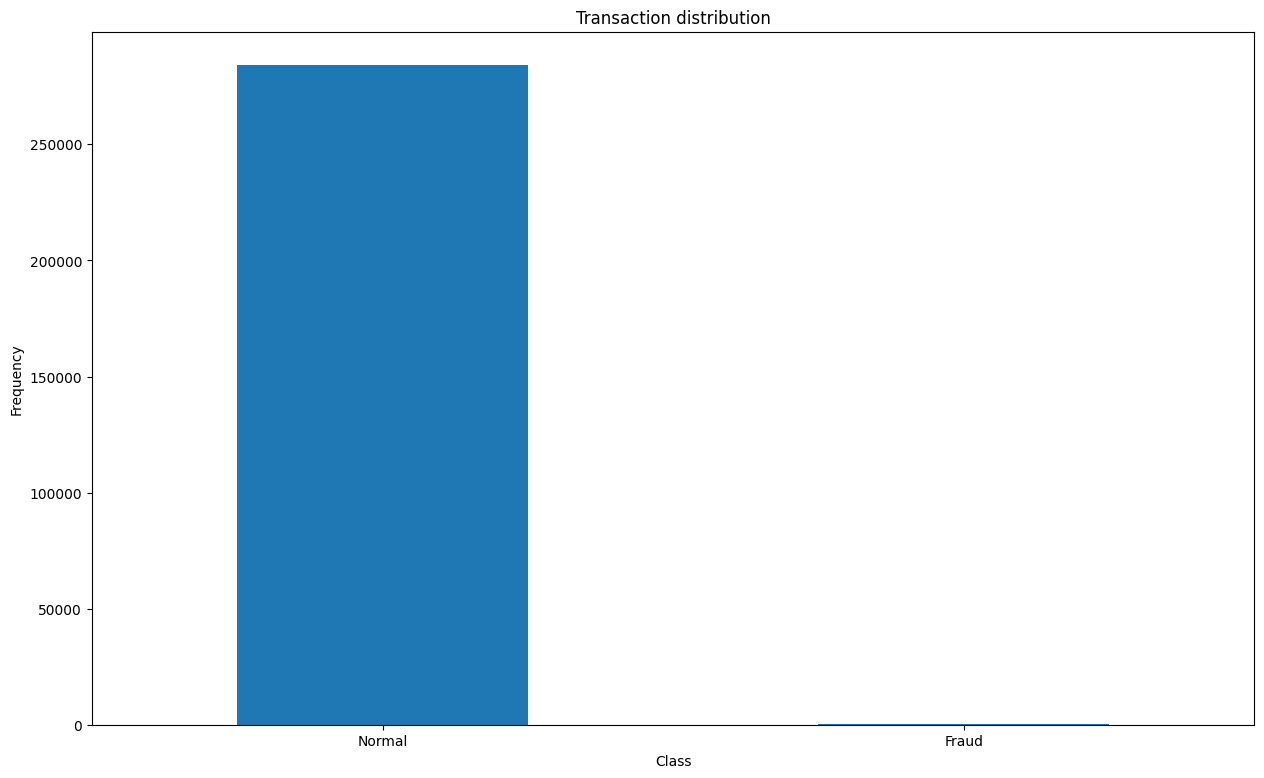

In [17]:
Class_counts = pd.value_counts(Card['Class'], sort= True)
Class_counts.plot(kind = 'bar', rot=0)
plt.title("Transaction distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [18]:
fraud = Card[Card['Class']==1]
legit = Card[Card['Class']==0]
print(fraud)

            Time        V1        V2        V3        V4        V5        V6  \
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [19]:
print(fraud.shape, legit.shape)

(492, 31) (284315, 31)


In [21]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [22]:
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


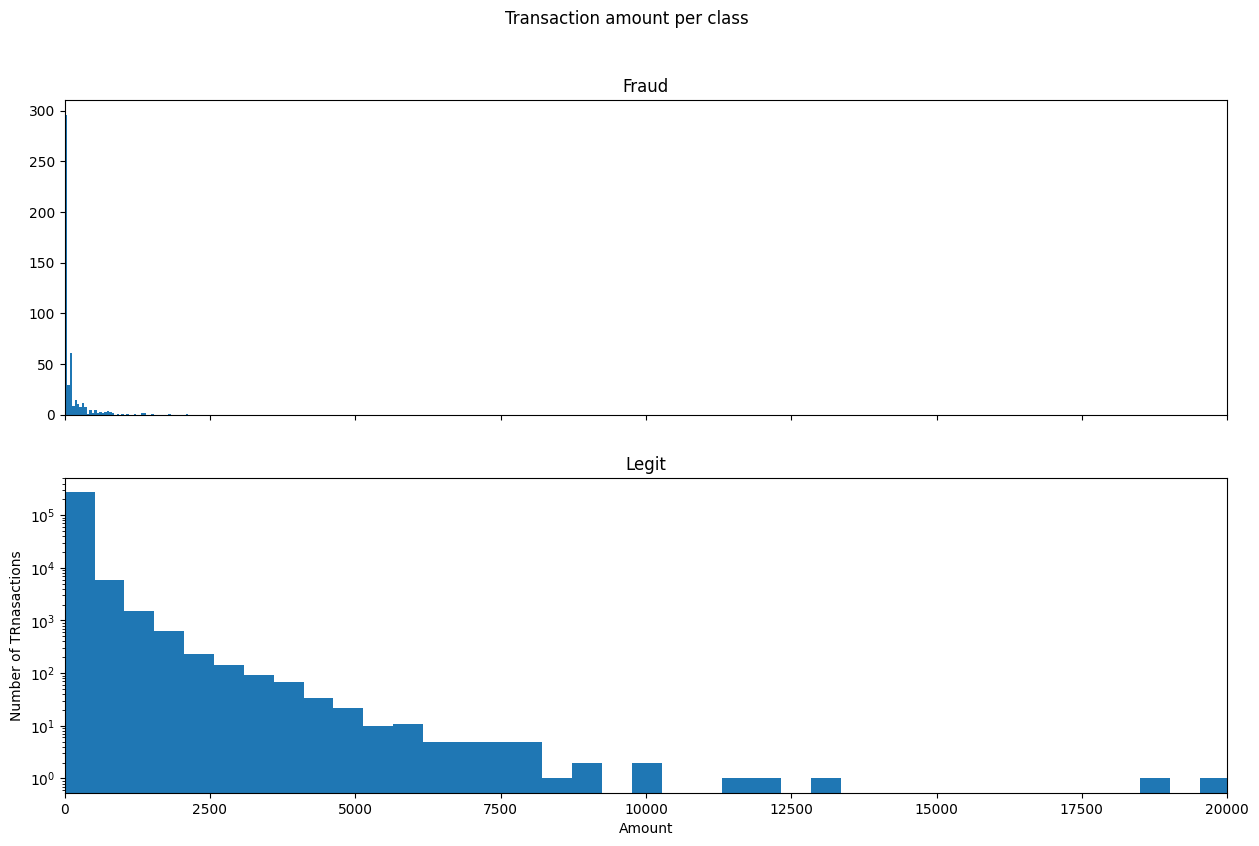

In [34]:
c, (ax1, ax2) = plt.subplots(2,1, sharex=True)
c.suptitle('Transaction amount per class')
bins=50
ax1.hist (fraud.Amount, bins=bins)
ax1.set_title('Fraud')
ax2.hist (legit.Amount, bins=bins)
ax2.set_title('Legit')
plt.xlabel('Amount')
plt.ylabel('Number of TRnasactions')
plt.xlim(0,20000)
plt.yscale('log')
plt.show();

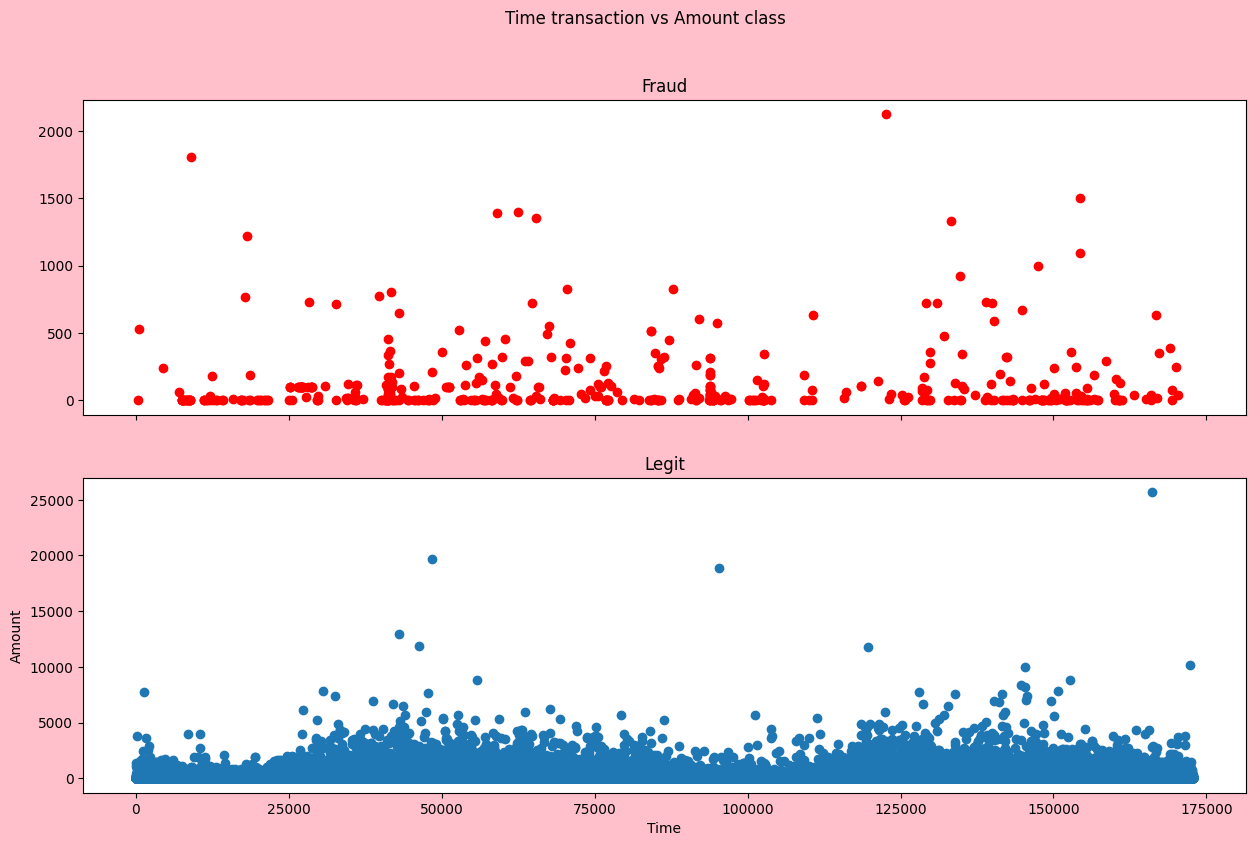

In [46]:
# Check fradulent transaction during certain time period
c, (ax1, ax2) = plt.subplots(2,1, sharex=True)
c.suptitle('Time transaction vs Amount class')
bins=50
ax1.scatter (fraud.Time, fraud.Amount, c="r")
ax1.set_title('Fraud')
ax2.scatter (legit.Time, legit.Amount)
ax2.set_title('Legit')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show();

In [47]:
# take sample of data
card1 = Card.sample(frac=0.1, random_state=1)
card1.shape

(28481, 31)

In [48]:
fraud = card1[card1['Class']==1]
legit = card1[card1['Class']==0]
fraction = len(fraud)/float(len(legit))
print(fraction)
print("Fraud cases : {}".format(len(fraud)))
print("valid cases : {}".format(len(legit)))

0.0017234102419808666
Fraud cases : 49
valid cases : 28432


<Axes: >

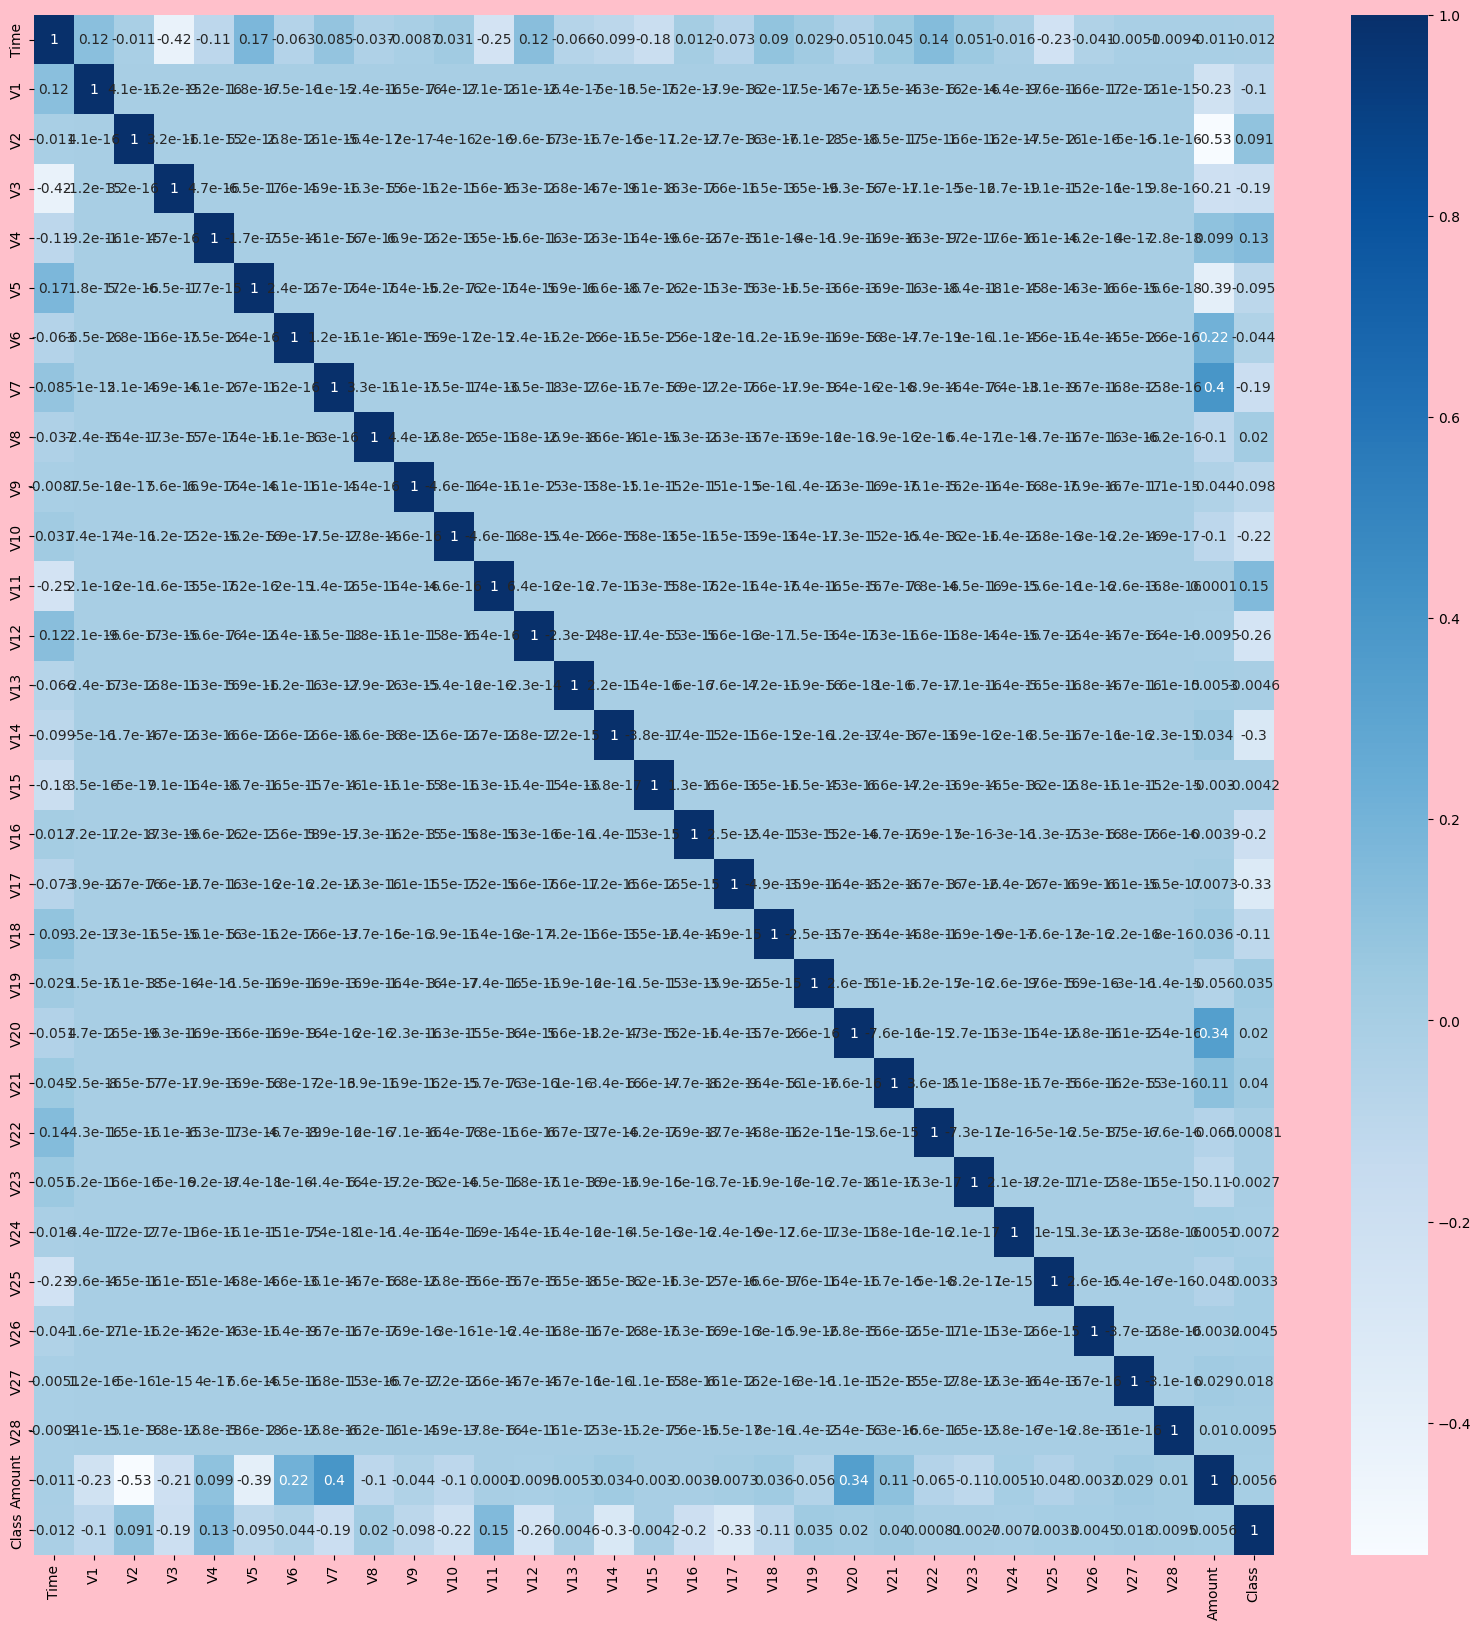

In [55]:
#heatmap
import seaborn as sns
corrmatrix= card1.corr()
corr_features = corrmatrix.index
plt.figure(figsize=(20,20))
sns.heatmap(Card[corr_features].corr(), annot=True, cmap="Blues")